# Section 3: Training a Supervised Learning Model
### Lecture 10: Interpreting the Logistic Regression Model
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('credit_card.csv')

y = df['Class']
X = df.drop(['Class','Amount','Time'], axis=1).copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

In [10]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight={0:1, 1:50})

model.fit(X_train, y_train)

LogisticRegression(class_weight={0: 1, 1: 50})

In [11]:
model.classes_

array([0, 1], dtype=int64)

In [4]:
# y = mx + c
# B_0 + B_1*x_1 + B_2*x_2 etc 

model.coef_

array([[ 0.11077592, -0.06859069, -0.01967696,  0.88409344,  0.09144915,
        -0.18473897,  0.05203225, -0.36027874, -0.1543006 , -0.61276151,
         0.23644341, -0.58795584, -0.39928999, -0.67522941, -0.11132962,
        -0.42065113, -0.09667066, -0.03722182, -0.09650186, -0.12984166,
         0.29407768,  0.52342799, -0.18790098,  0.00292142,  0.00887645,
        -0.42029811, -0.13369595,  0.03408903]])

In [5]:
model.intercept_

array([-5.61540575])

In [6]:
model.predict_proba(X_test) 

# true probabilities would require model calibration isotonic regression etc
# https://scikit-learn.org/stable/modules/calibration.html

array([[0.98667522, 0.01332478],
       [0.99558961, 0.00441039],
       [0.99587779, 0.00412221],
       ...,
       [0.99220802, 0.00779198],
       [0.99792357, 0.00207643],
       [0.994318  , 0.005682  ]])

# SHAP
- The Shapley value is the average expected marginal contribution of one feature after all possible feature combinations have been considered. 
- Shapley value helps to determine a payoff for all of the features when each feature might have contributed more or less than the others.

In [7]:
import shap
shap.initjs()

C:\Users\rball\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


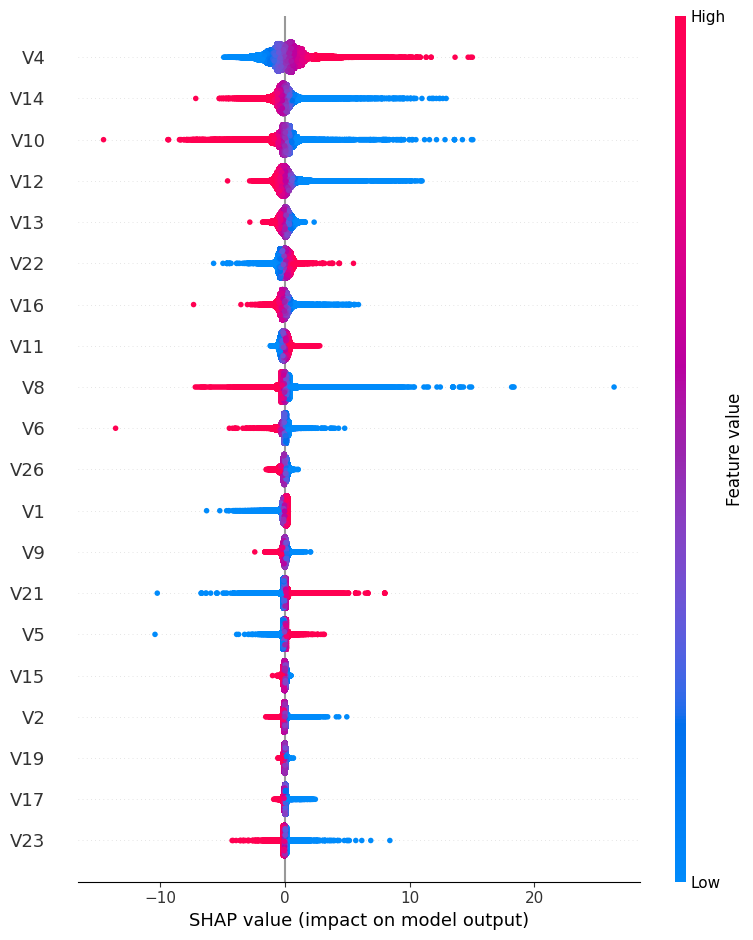

In [8]:
explainer = shap.LinearExplainer(model, X_train)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X)